# Predict Number of People in Goodlife

## Group3

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

### Load the data

In [9]:
data_path = 'problem1.csv'
df = pd.read_csv(data_path)
df

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19


In [10]:
df = df.drop(columns=['date'])
df

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...
62179,23,67348,5,1,0,61.07,0,1,3,18
62180,21,67955,5,1,0,61.07,0,1,3,18
62181,25,68560,5,1,0,56.71,0,1,3,19
62182,18,69167,5,1,0,56.71,0,1,3,19


In [11]:
print(df.isnull().sum())

number_people           0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   timestamp             62184 non-null  int64  
 2   day_of_week           62184 non-null  int64  
 3   is_weekend            62184 non-null  int64  
 4   is_holiday            62184 non-null  int64  
 5   temperature           62184 non-null  float64
 6   is_start_of_semester  62184 non-null  int64  
 7   is_during_semester    62184 non-null  int64  
 8   month                 62184 non-null  int64  
 9   hour                  62184 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.7 MB


### EDA

c:\Users\dut08\Documents\conestoga\sem1\foundation\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


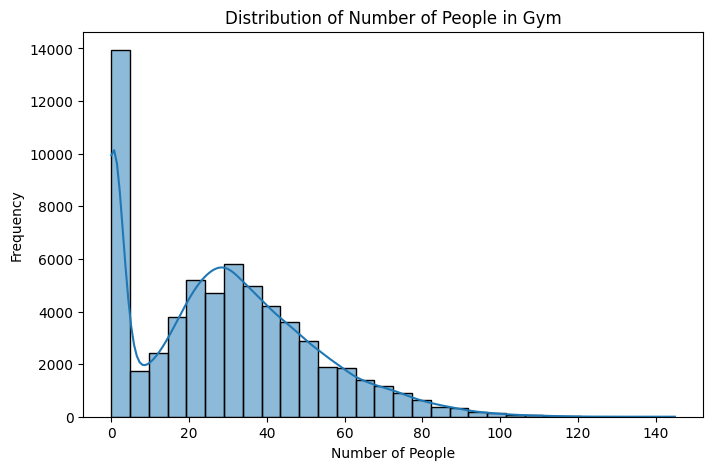

In [14]:
# Exploratory Data Analysis (EDA)
# Plot distribution of the target variable 'Number of people'
plt.figure(figsize=(8, 5))
sns.histplot(df['number_people'], bins=30, kde=True)
plt.title('Distribution of Number of People in Gym')
plt.xlabel('Number of People')
plt.ylabel('Frequency')
plt.show()

- Low Crowding:
The high frequency of low crowd counts suggests that there are many periods when the gym is not heavily used. This information can be useful for identifying and promoting these off-peak times to members.
- Peak Usage Levels:
The peaks at around 20 and 40 people indicate common usage levels. Understanding the factors that contribute to these peaks can help in managing and optimizing gym resources and scheduling.

In [15]:
# Scatter plots for continuous variables
continuous_features = ['timestamp', 'temperature']

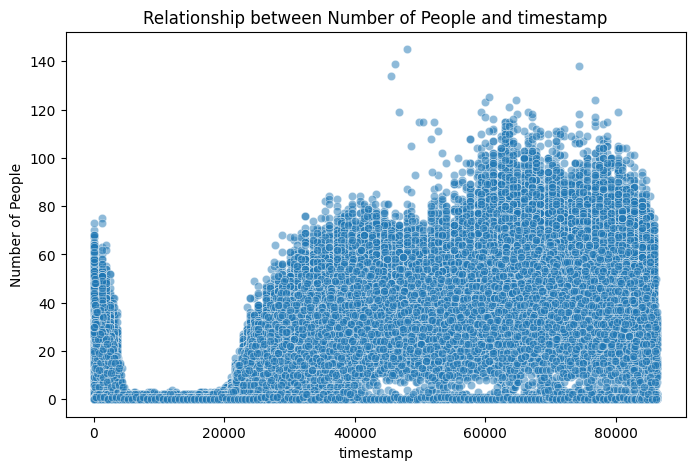

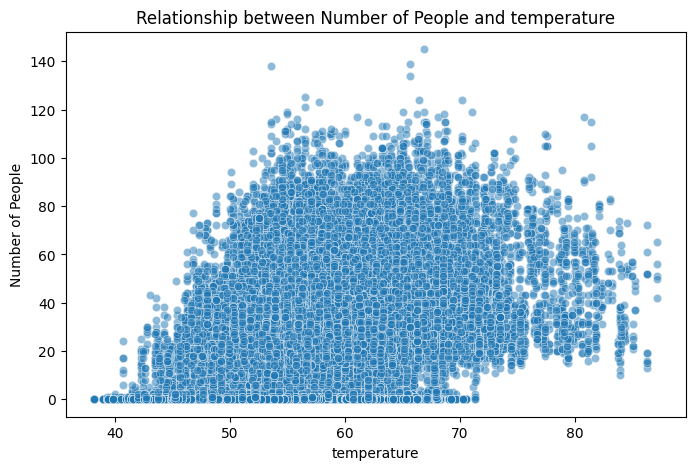

In [17]:
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=feature, y='number_people', alpha=0.5)
    plt.title(f'Relationship between Number of People and {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of People')
    plt.show()

- Peak Gym Hours:
The timestamp relationship suggests that the gym experiences peak usage during midday hours. This information is crucial for scheduling staff and managing resources effectively.
Encouraging members to use the gym during off-peak hours (early morning and late night) could help distribute the crowd more evenly throughout the day.
- Impact of Temperature:
Moderate temperatures seem to be associated with higher gym attendance. This could be because moderate weather conditions are more comfortable for people to travel to the gym.
Extreme temperatures, especially higher temperatures, seem to deter people from going to the gym. Understanding this pattern can help in planning promotional activities or indoor events during extreme weather conditions to maintain attendance levels.

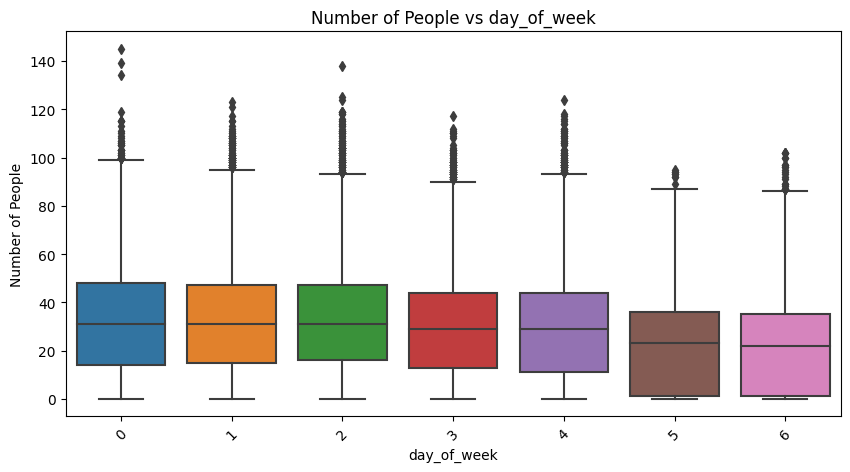

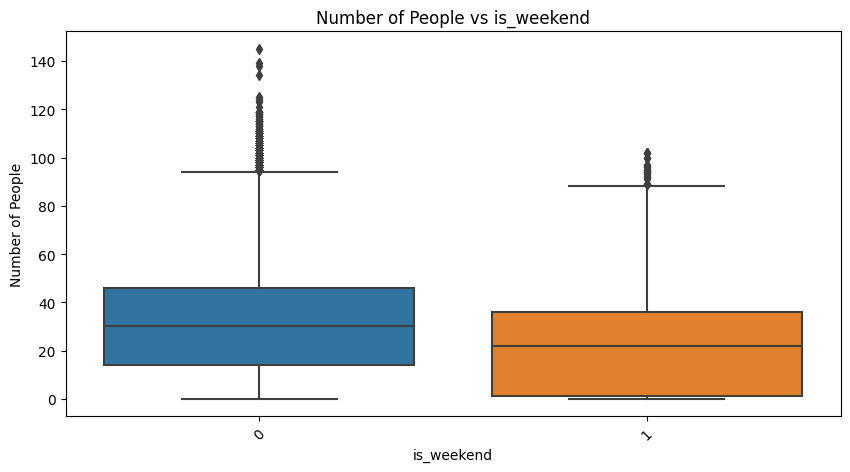

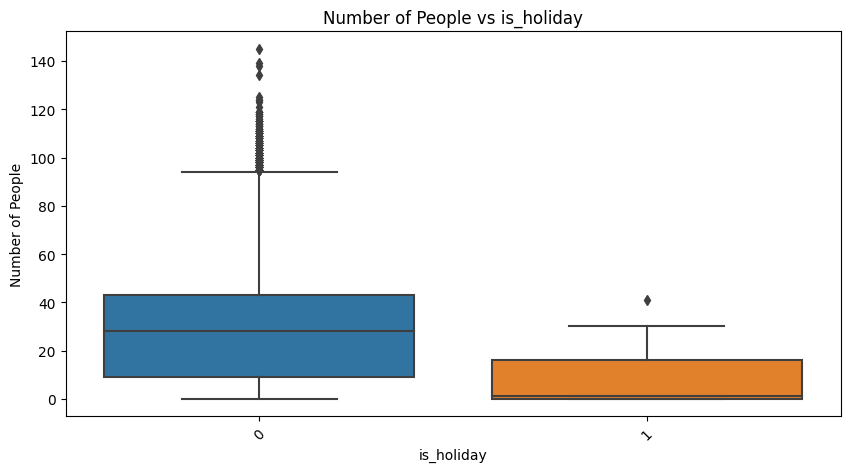

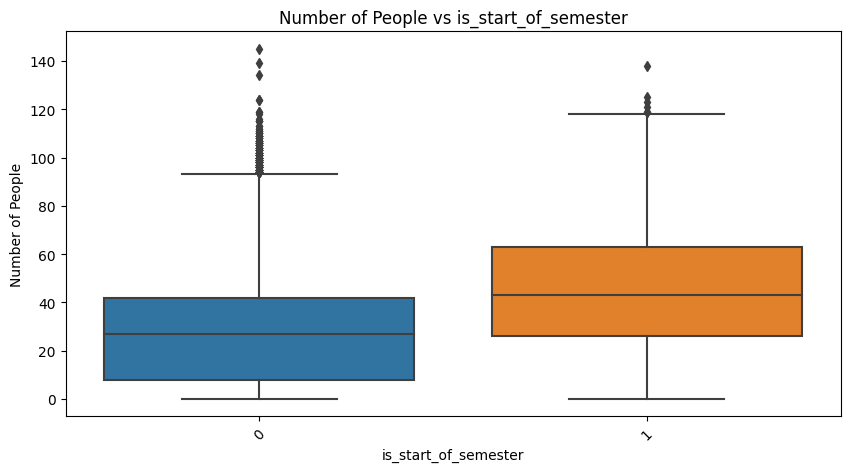

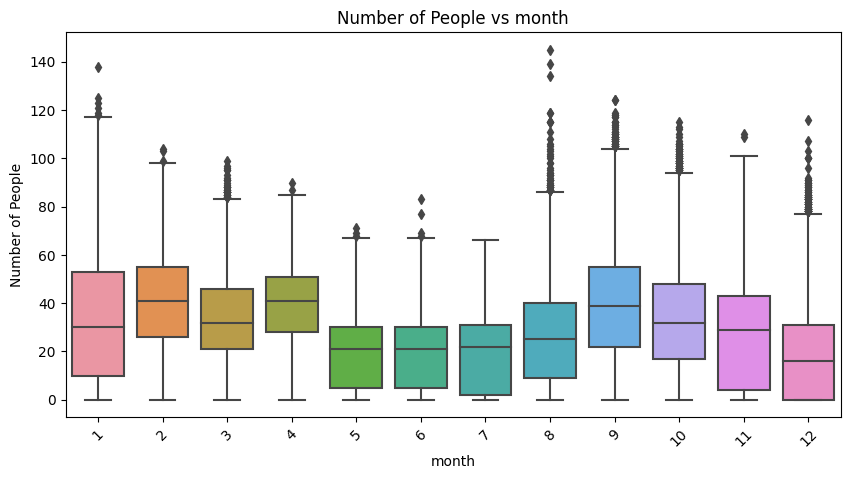

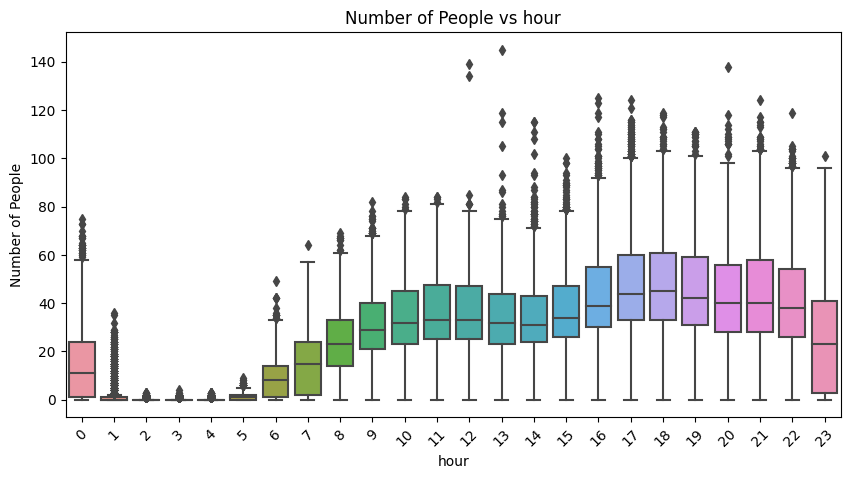

In [18]:
# Box plots for categorical variables
categorical_features = ['day_of_week', 'is_weekend', 'is_holiday', 'is_start_of_semester', 'month', 'hour']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=feature, y='number_people')
    plt.title(f'Number of People vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of People')
    plt.xticks(rotation=45)
    plt.show()

- Weekly Trends:
Gym attendance is fairly consistent across the week, but slightly lower on weekends. Promoting weekend specials or classes could help boost weekend attendance.
- Holiday Impact:
Holidays have a significant impact on gym attendance, with fewer people visiting the gym. This could be an opportunity to offer special holiday promotions or encourage alternative workout options.
- Semester Influence:
The start of the semester sees higher attendance, possibly due to new student memberships or renewed fitness goals. Special programs targeting new members during this time could help retain these users.
- Seasonal Variations:
January and September are peak months for gym attendance, likely due to New Year resolutions and the start of the academic year. Tailoring marketing strategies to leverage these peaks can maximize membership and attendance.
- Daily Patterns:
Understanding that peak gym hours are between 4 PM and 7 PM can help in resource allocation, such as staffing, maintenance, and class scheduling, to ensure optimal service during busy times.

### Feature Selection

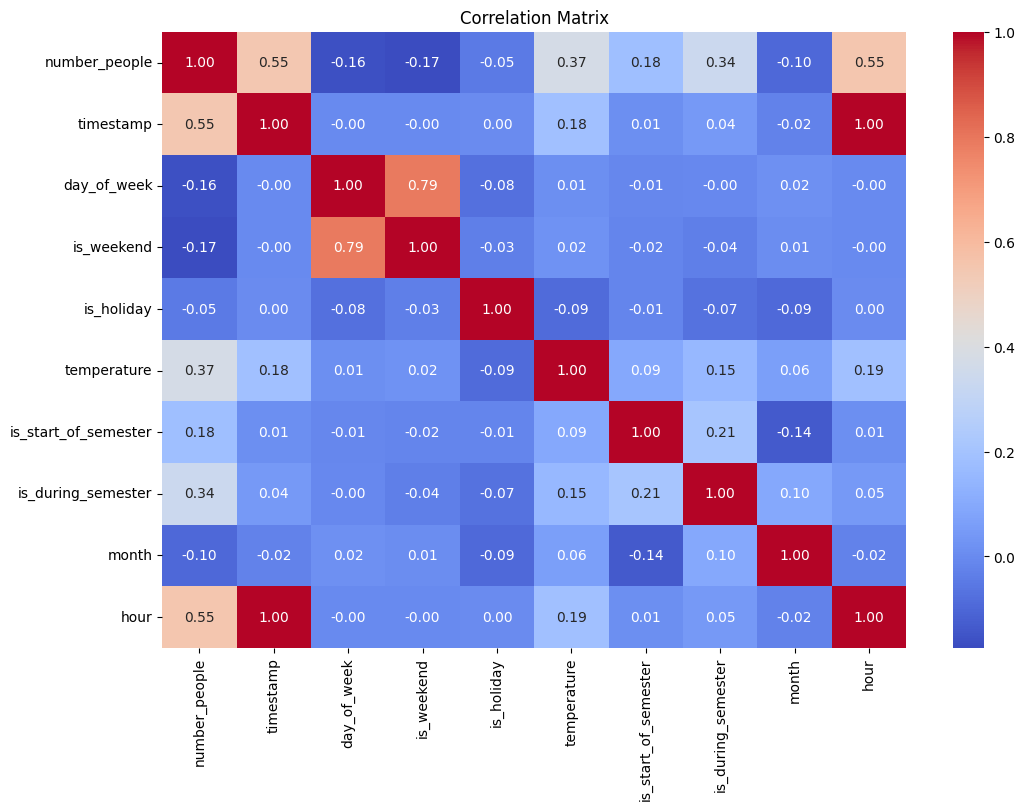

In [19]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- Strong Positive Correlations:
number_people has a strong positive correlation with timestamp (0.55) and hour (0.55), indicating that the time of day is a significant factor in predicting the number of people in the gym.
number_people also has a moderate positive correlation with temperature (0.37) and is_during_semester (0.34).
- Moderate Positive Correlations:
day_of_week is strongly correlated with is_weekend (0.79), which is expected since weekends are part of the week.
is_start_of_semester has a moderate positive correlation with is_during_semester (0.21).
- Weak or No Correlations:
number_people has very weak or no correlation with is_holiday (-0.05), month (-0.10), and is_weekend (-0.17), suggesting these features have little influence on gym attendance.

### Normalization and split the dataset

In [22]:
# Define features and target variable
X = df.drop(columns=['number_people', 'day_of_week'])
y = df['number_people']

In [23]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Train the model

In [25]:
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(eval_metric='rmse', random_state=42),
    "Linear Regression": LinearRegression()
}


Performance for Random Forest:
RMSE: 7.78
R^2 Score: 0.88


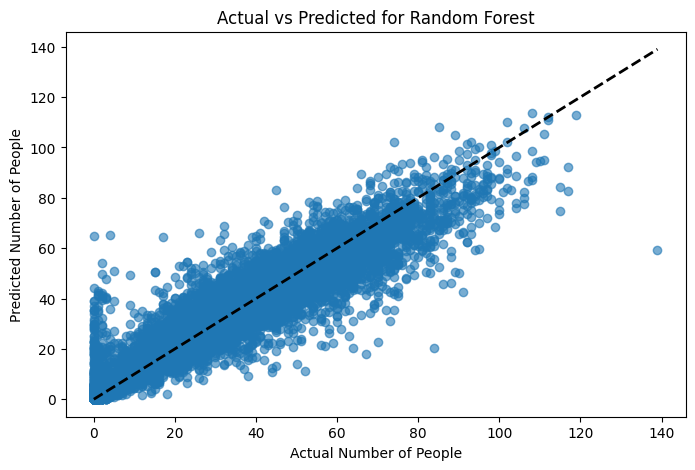


Performance for XGBoost:
RMSE: 10.00
R^2 Score: 0.81


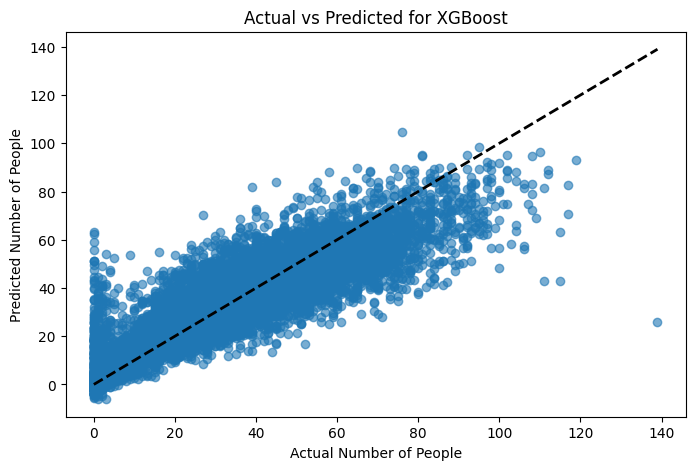


Performance for Linear Regression:
RMSE: 15.87
R^2 Score: 0.51


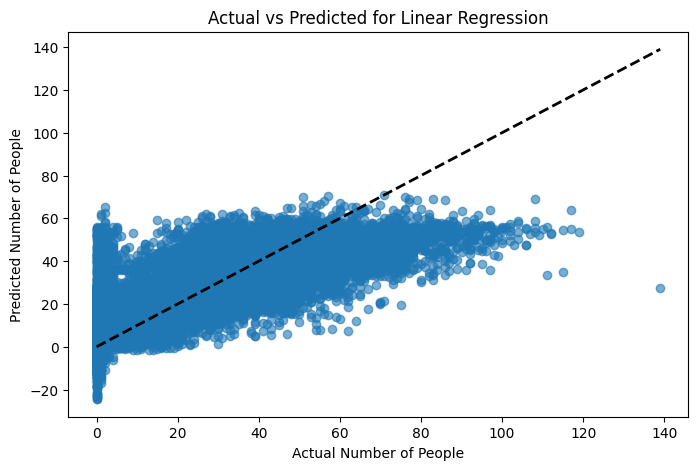

In [26]:
# Train models and evaluate
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R^2': r2}
    # Print evaluation metrics
    print(f"\nPerformance for {model_name}:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    # Plot actual vs predicted
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.xlabel('Actual Number of People')
    plt.ylabel('Predicted Number of People')
    plt.show()

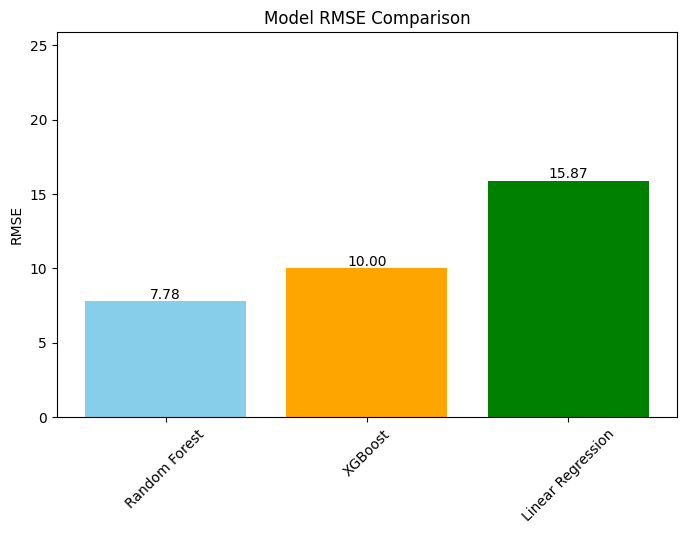

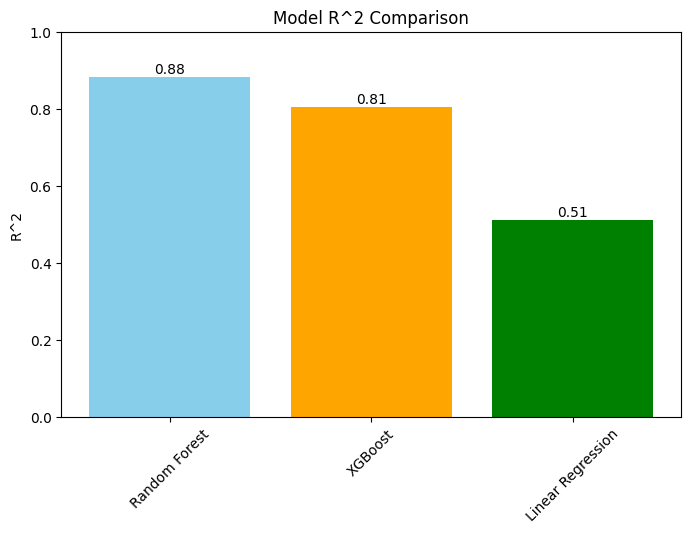

In [28]:
# Plot RMSE and R^2 comparison
metrics = ['RMSE', 'R^2']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    values = [results[model][metric] for model in models]
    bars = plt.bar(models.keys(), values, color=['skyblue', 'orange', 'green'])
    plt.title(f'Model {metric} Comparison')
    plt.ylabel(metric)
    
    if metric == 'RMSE':
        plt.ylim(0, max(values) + 10)
        for bar, value in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')
    else:
        plt.ylim(0, 1)
        for bar, value in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')
    
    plt.xticks(rotation=45)
    plt.show()


- Best Performing Model:
The Random Forest model is the best performing among the three, with the lowest RMSE and the highest R² score. It accurately predicts the number of people in the gym and has the least error, making it the most reliable model for this task.
- XGBoost Model:
The XGBoost model also performs well but has higher error and lower R² compared to the Random Forest model. It can be considered a good alternative but may need further tuning to match the performance of Random Forest.
- Linear Regression Model:
The Linear Regression model performs significantly worse than the other two models. The high RMSE and low R² score indicate that it is not suitable for this prediction task due to its inability to capture the complexity of the data.
- Conclusion:
Based on the performance metrics and scatter plot analysis, the Random Forest model is the recommended choice for predicting gym crowd levels. It provides the most accurate predictions and effectively handles the variability in the data. Future efforts can focus on further tuning this model and exploring additional features to enhance prediction accuracy.